In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import numpy as np
from IPython.core.interactiveshell import InteractiveShell
from functools import reduce

from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

import statsmodels.formula.api as smf
from scipy.stats import pearsonr

InteractiveShell.ast_node_interactivity = 'all' 
plt.style.use('ggplot')

C:\Software\Anaconda37\envs\data_science_env\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
Using TensorFlow backend.
C:\Software\Anaconda37\envs\data_science_env\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Software\Anaconda37\envs\data_science_env\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Software\Anaconda37\envs\data_science_env\lib\site-packages\tensorflow\python\framework\dty

In [2]:
plt.rcParams['figure.figsize'] = (15, 5)
plt.rcParams['axes.titlesize'] = 24
plt.rcParams['axes.labelsize'] = 22
plt.rcParams['ytick.labelsize'] = 20
plt.rcParams['xtick.labelsize'] = 20
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

In [3]:
import json

model_root = 'trained_models/reinforcement_learning'
results = []
for model_name in os.listdir(model_root):
    with open(os.path.join(model_root, model_name, 'config.json')) as f:
        data = json.load(f)
    
    base_model = data['starting_actor_critic']
    if base_model is not None:
        base_model = os.path.basename(base_model)
    progress = pd.read_csv(os.path.join(model_root, model_name, 'progress.txt'), sep='\t')
    
    r = pd.read_csv(os.path.join('reports', f'{model_name}.csv'))
    results.append(
        {'model':model_name, 
         'base_model':base_model, 
         'epochs':progress.Epoch.count(),
         'train_enemies':''.join([str(e) for e in data['enemies']]), 
         'progress':progress,
         'result':r
        })

In [4]:
df = pd.DataFrame([(l['model'], l['base_model'], l['epochs'], l['train_enemies']) for l in results], 
                  columns=['model', 'base_model', 'epochs', 'train_enemies'])
df

,model,base_model,epochs,train_enemies
0,1590573752.3423483,None,228,1367
1,1590579471.1575735,None,1048,1267
2,1590649982.3414495,1590579471.1575735,1336,1267
3,1590741419.5509562,1590579471.1575735,4,3458
4,1590741556.9109056,1590579471.1575735,2000,3458
5,1590827635.8673058,1590579471.1575735,2000,3467
6,1590918282.3727078,1590579471.1575735,1665,1367
7,1591007624.3262362,1590579471.1575735,1594,2367
8,1591084878.9942527,1590579471.1575735,2000,2467
9,1591130472.260961,None,2000,2367


In [5]:
lists = [['1591261004.787129'], ['1591803558.255182'], ['1591891998.8024027']]
for i, row in df.iterrows():
    for l in lists:
        if row.base_model in l:
            l.append(row.model)

In [6]:
progress_list = [r['progress'] for r in results if r['model'] in lists[0]]
progress_df = pd.concat(progress_list).reset_index(drop=True).reset_index()
progress_df['Epoch'] = progress_df['index']
progress_df.drop(columns='index', inplace=True)
progress_df.set_index('Epoch', inplace=True)

In [97]:
t = []
for i, experiment in enumerate(lists):
    progress_list = [r['progress'] for r in results if r['model'] in experiment]
    progress_df = pd.concat(progress_list).reset_index(drop=True).reset_index()
    progress_df['Epoch'] = progress_df['index']
    progress_df.drop(columns='index', inplace=True)
    progress_df.set_index('Epoch', inplace=True)
    progress_df['Time'] = progress_df['Time'].diff(1)
    
    t.append(progress_df.Time.median())

In [98]:
np.mean(t)
np.median(t)

26.880122582117338

28.028755426406633

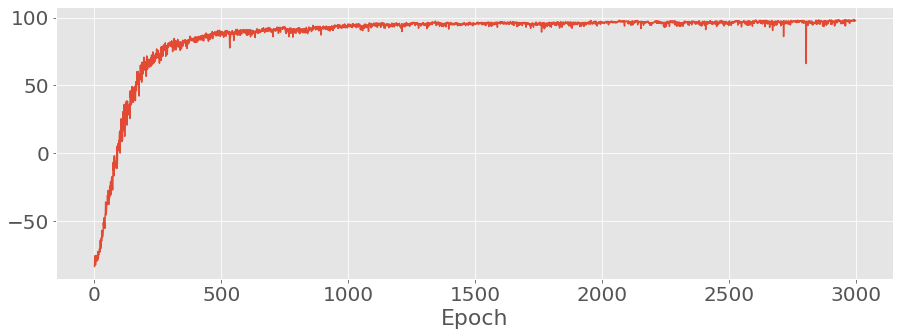

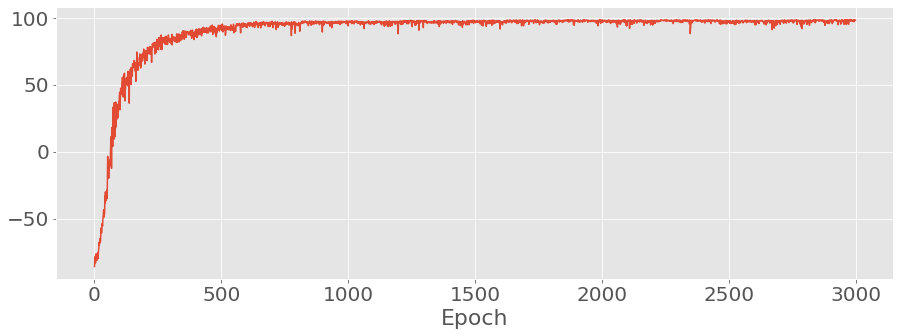

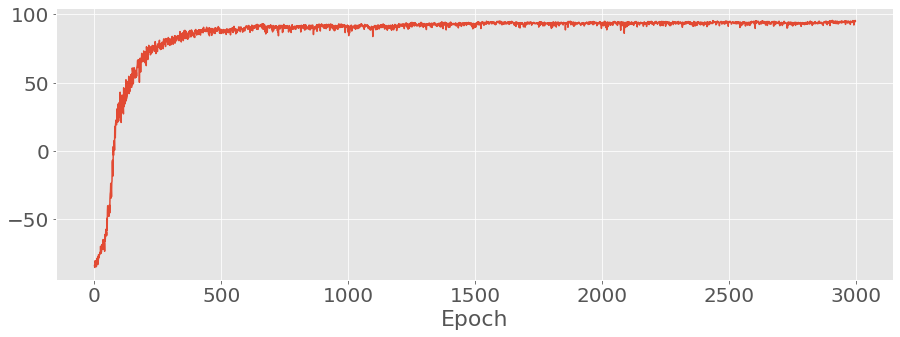

In [7]:
for i, experiment in enumerate(lists):
    progress_list = [r['progress'] for r in results if r['model'] in experiment]
    progress_df = pd.concat(progress_list).reset_index(drop=True).reset_index()
    progress_df['Epoch'] = progress_df['index']
    progress_df.drop(columns='index', inplace=True)
    progress_df.set_index('Epoch', inplace=True)
    _ = progress_df.AverageEpRet.plot()
    plt.show()
    progress_df.reset_index().to_csv(f'data_for_plots/ppo_{i}_progress.csv', index=False)

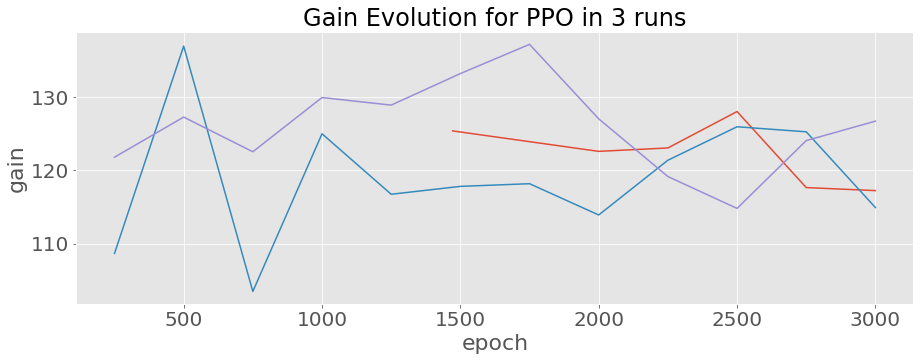

In [79]:
for i, experiment in enumerate(lists):
    progress_list = [(r['epochs'], 8 / np.sum(1 / r['result'].gain)) for r in results if r['model'] in experiment]
    progress = pd.DataFrame(progress_list, columns=['epoch', 'score'])
    progress['epoch'] = progress.epoch.cumsum()
    progress.set_index('epoch', inplace=True)
    _ = progress.score.plot()
#     plt.show()
    progress.reset_index().to_csv(f'data_for_plots/ppo_{i}_result.csv', index=False)    
_ = plt.ylabel('gain')
_ = plt.title('Gain Evolution for PPO in 3 runs')
plt.savefig('paper/images/ppo_gain_evolution_3_runs.eps', format='eps')

In [9]:
progress_list = [(r['model'], r['epochs'], 8 / np.sum(1 / r['result'].gain)) for r in results if r['model'] in lists[2]]
progress = pd.DataFrame(progress_list, columns=['model', 'epoch', 'score'])
progress['epoch'] = progress.epoch.cumsum()
progress.set_index('epoch', inplace=True)

In [10]:
[r['result'] for r in results if r['model']=='1591935751.1014764'][0]

,enemy,gain,avg_player_life,avg_enemy_life,avg_duration,min_player_life,max_player_life,min_enemy_life,max_enemy_life,min_duration,max_duration
0,1,199.610000,99.600000,0.000000,0.0,96.0,100.0,0,0.0,159,300
1,2,189.143333,89.133333,0.000000,0.0,78.0,94.0,0,0.0,150,274
2,3,85.010000,5.333333,20.333333,0.0,0.0,58.0,0,70.0,226,537
3,4,80.170000,3.493333,23.333333,0.0,0.0,31.6,0,60.0,388,964
4,5,158.830000,58.820000,0.000000,0.0,34.6,80.2,0,0.0,253,529
5,6,194.370000,94.360000,0.000000,0.0,78.4,100.0,0,0.0,166,246
6,7,191.170000,91.160000,0.000000,0.0,70.0,94.0,0,0.0,123,166
7,8,140.610000,40.600000,0.000000,0.0,3.4,72.4,0,0.0,261,722


In [11]:
last = ['1591972086.6519217', '1591880695.9546342', '1591641901.9027252']
found = [r['result'] for r in results if r['model'] in last]

r3 = [8 / np.sum(1/f.gain) for f in found]

In [12]:
last = ['1591606067.8750339', '1591851592.3176994', '1591942954.9945362']
found = [r['result'] for r in results if r['model'] in last]

r2 = [8 / np.sum(1/f.gain) for f in found]

In [13]:
r2

[122.58071320805254, 113.89813214476209, 127.01880705967213]

In [14]:
r3

[117.22484876609629, 114.91506994434918, 126.70141895181527]

In [30]:
r = pd.DataFrame(zip(r2, r3), columns=['2000 epochs', '3000 epochs'])

In [31]:
r

,2000 epochs,3000 epochs
0,122.580713,117.224849
1,113.898132,114.915070
2,127.018807,126.701419


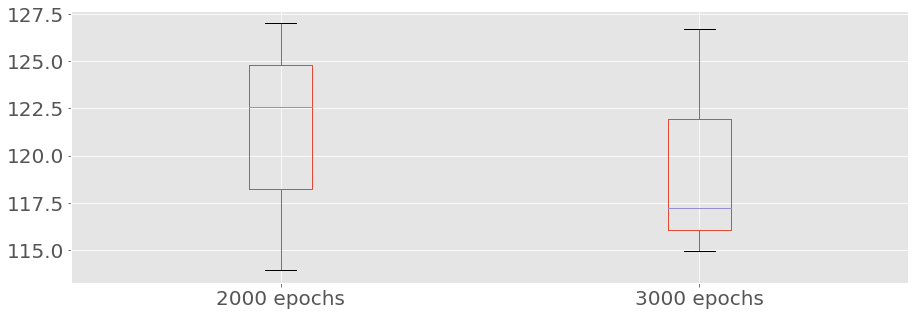

In [34]:
_ = r.boxplot()
plt.savefig('paper/images/final_epochs_comparison.eps', format='eps')

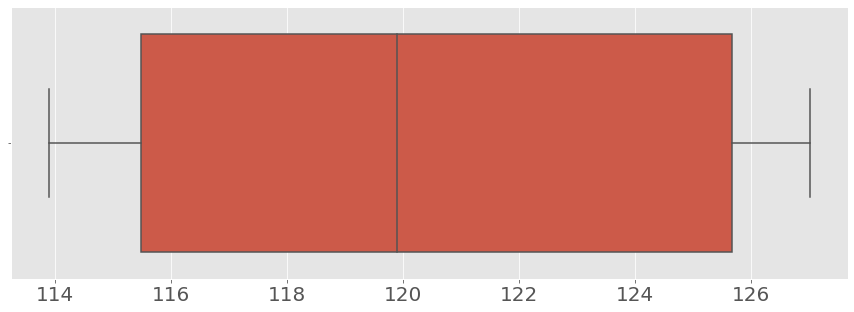

In [23]:
_ = sns.boxplot(r)

In [15]:
np.mean(r3)
np.median(r3)

np.mean(r2)
np.median(r2)

119.61377922075359

117.22484876609629

121.1658841374956

122.58071320805254

In [42]:
last2 = ['1591606067.8750339', '1591851592.3176994', '1591942954.9945362']
last3 = ['1591972086.6519217', '1591880695.9546342', '1591641901.9027252']

found = [r['result'].set_index('enemy').avg_duration for r in results if r['model'] in last2]

# r2 = [8 / np.sum(1/f.gain) for f in found]

In [46]:
found[2]

enemy
1    0.0
2    0.0
3    0.0
4    0.0
5    0.0
6    0.0
7    0.0
8    0.0
Name: avg_duration, dtype: float64

In [48]:
model_to_gain = dict()
for r in results:
    model_to_gain[r['model']] = 8 / np.sum(1 / r['result'].gain)

In [50]:
df['gain'] = df.model.apply(lambda m: model_to_gain[m])

In [90]:
[r['result'] for r in results if r['model']=='1591972086.6519217'][0]

,enemy,gain,avg_player_life,avg_enemy_life,avg_duration,min_player_life,max_player_life,min_enemy_life,max_enemy_life,min_duration,max_duration
0,1,199.810000,99.800000,0.000000,0.0,98.0,100.0,0,0.0,159,341
1,2,190.343333,90.333333,0.000000,0.0,84.0,94.0,0,0.0,151,233
2,3,70.276667,0.266667,30.000000,0.0,0.0,6.0,0,50.0,335,437
3,4,64.110000,0.433333,36.333333,0.0,0.0,13.0,0,70.0,435,928
4,5,174.610000,74.600000,0.000000,0.0,60.4,91.0,0,0.0,218,496
5,6,195.850000,95.840000,0.000000,0.0,89.2,98.2,0,0.0,153,217
6,7,193.270000,93.260000,0.000000,0.0,80.2,94.6,0,0.0,123,153
7,8,141.896667,42.553333,0.666667,0.0,0.0,86.2,0,10.0,195,649


In [51]:
df

,model,base_model,epochs,train_enemies,gain
0,1590573752.3423483,None,228,1367,26.687000
1,1590579471.1575735,None,1048,1267,100.099053
2,1590649982.3414495,1590579471.1575735,1336,1267,122.133110
3,1590741419.5509562,1590579471.1575735,4,3458,95.360921
4,1590741556.9109056,1590579471.1575735,2000,3458,44.165203
5,1590827635.8673058,1590579471.1575735,2000,3467,75.309663
6,1590918282.3727078,1590579471.1575735,1665,1367,110.197467
7,1591007624.3262362,1590579471.1575735,1594,2367,136.106111
8,1591084878.9942527,1590579471.1575735,2000,2467,85.221185
9,1591130472.260961,None,2000,2367,99.979586


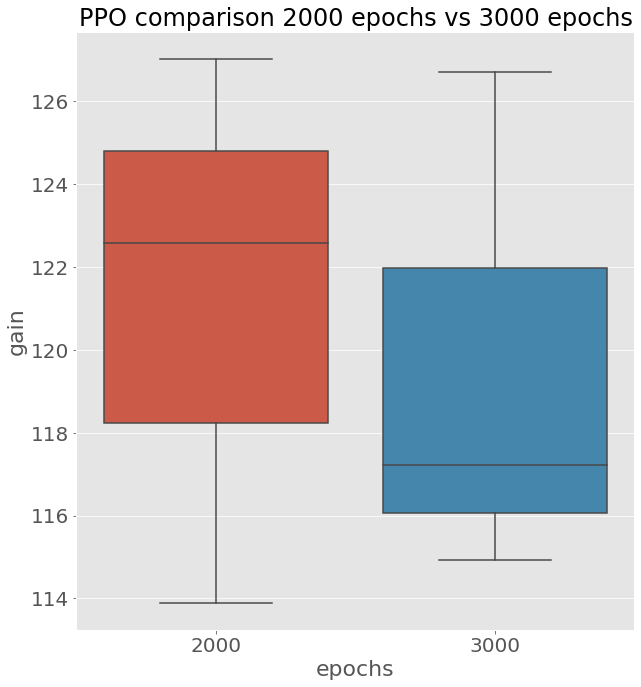

In [73]:
last2 = pd.DataFrame([122.580713, 113.898132, 127.018807], columns=['gain'])
last3 = pd.DataFrame([117.224849, 114.915070, 126.701419], columns=['gain'])
last2['epochs'] = 2000
last3['epochs'] = 3000
c = pd.merge(last2, last3, how='outer')

fig, ax = plt.subplots(figsize=(10, 11))
_ = sns.boxplot(x='epochs', y='gain', data=c, ax=ax)
_ = ax.set_title('PPO comparison 2000 epochs vs 3000 epochs')
fig.savefig('paper/images/ppo_2000_vs_3000_epochs.eps', format='eps')


Text(0.5, 1.0, 'PPO random initialization vs PSO cascade')

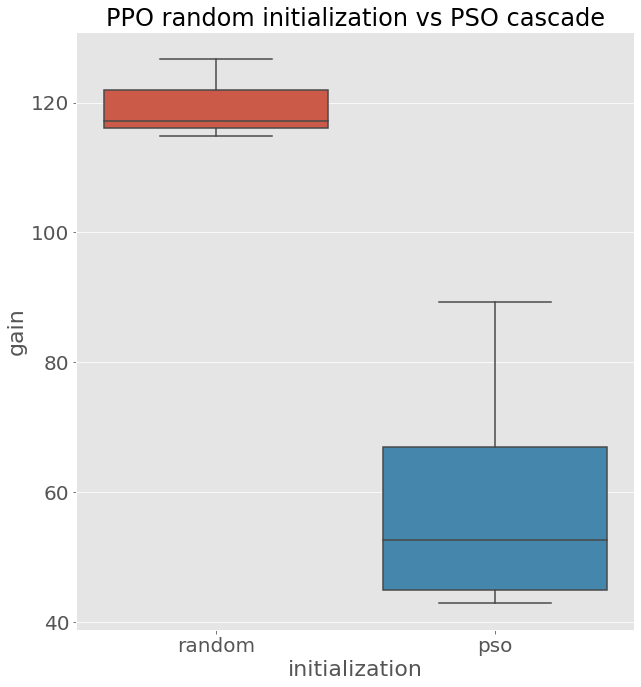

In [74]:
cascade = pd.DataFrame([43.005925, 45.693536, 59.552746, 89.266536], columns=['gain'])
ri = pd.DataFrame([117.224849, 114.915070, 126.701419, None], columns=['gain'])
ri['initialization'] = 'random'
cascade['initialization'] = 'pso'
c = pd.merge(ri, cascade, how='outer')


fig, ax = plt.subplots(figsize=(10, 11))
_ = sns.boxplot(x='initialization', y='gain', data=c, ax=ax)
_ = ax.set_title('PPO random initialization vs PSO cascade')
fig.savefig('paper/images/random_vs_pso_initialization.eps', format='eps')